In [1]:
#import dependencies 

import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#pull data from csvs 

fao_data_csv = "Resources/aquastatt.csv"
who_data_csv = "Resources/choleraa.csv"

fao_data=pd.read_csv(fao_data_csv)
chol_data = pd.read_csv(who_data_csv)

#test FAO data
fao_data.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Myanmar,28.0,Dependency ratio,4192.0,1992.0,14.13,I,NaN
1,Myanmar,28.0,Dependency ratio,4192.0,1997.0,14.13,I,NaN
2,Myanmar,28.0,Dependency ratio,4192.0,2002.0,14.13,I,NaN
3,Myanmar,28.0,Dependency ratio,4192.0,2007.0,14.13,I,NaN
4,Myanmar,28.0,Dependency ratio,4192.0,2012.0,14.13,I,NaN


In [3]:
#check columns 
#what??
fao_data.columns

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol', 'Md'],
      dtype='object')

In [4]:
#data came in with column data offset from "real" column names. Filter out "right data" with wrong column headers

fao_cleanup = fao_data[["Area", "Variable Name", "Year", "Value"]]

fao_cleanup.head()

,Area,Variable Name,Year,Value
0,Myanmar,Dependency ratio,1992.0,14.13
1,Myanmar,Dependency ratio,1997.0,14.13
2,Myanmar,Dependency ratio,2002.0,14.13
3,Myanmar,Dependency ratio,2007.0,14.13
4,Myanmar,Dependency ratio,2012.0,14.13


In [5]:
#Testing file_2
count2 = len(chol_data["COUNTRY (DISPLAY)"].value_counts())
# print(chol_data["COUNTRY (DISPLAY)"])
#creating a new dataframe with selected columns
clean_data = chol_data[["COUNTRY (DISPLAY)","YEAR (DISPLAY)","Display Value"]]

clean_df = pd.DataFrame(clean_data)

clean_df.head()


,COUNTRY (DISPLAY),YEAR (DISPLAY),Display Value
0,Afghanistan,1960,887
1,Bangladesh,1960,15618
2,India,1960,14621
3,Indonesia,1960,41
4,Myanmar,1960,259


In [6]:
#use .loc to filter out just rows with country names at head (take out rows at end that don't have data)

fao_targets = fao_cleanup.loc[fao_cleanup["Area"].isin(["Myanmar","Niger", "Nigeria", "Thailand"])]

fao_targets.index.name = "Index"

                              
fao_final = fao_targets.rename(columns={"Area":"Country"})

#convert year data to integers 

fao_final["Year"] = fao_final["Year"].astype(int)
fao_final


# # for country in fao_final:
#     if fao_final["Value"] == "NaN":
#         fao_final["Value"] = 0
        
# fao_indexed
fao_final.head()

,Country,Variable Name,Year,Value
Index,,,,
0,Myanmar,Dependency ratio,1992,14.13
1,Myanmar,Dependency ratio,1997,14.13
2,Myanmar,Dependency ratio,2002,14.13
3,Myanmar,Dependency ratio,2007,14.13
4,Myanmar,Dependency ratio,2012,14.13


In [7]:
# #selecting data for specific data
# #clean_d = clean_df.loc[clean_df["COUNTRY (DISPLAY)"] == "Nigeria", :]
who_final = clean_df.loc[clean_df["COUNTRY (DISPLAY)"].isin(["Nigeria","Niger","Myanmar", "Thailand"])]
who_final = who_final.rename(columns = {"COUNTRY (DISPLAY)": "Country", "YEAR (DISPLAY)": "Year", "Display Value": "Cholera Cases"})


# clean.head()
who_final.head()

,Country,Year,Cholera Cases
4,Myanmar,1960,259
13,Myanmar,1965,207
17,Thailand,1965,65
64,Myanmar,1993,1758
68,Nigeria,1993,4160


In [8]:
who_final = who_final.rename(columns = {"YEAR (DISPLAY)": "Year", "COUNTRY (DISPLAY)": "Country"})

who_final.head()

,Country,Year,Cholera Cases
4,Myanmar,1960,259
13,Myanmar,1965,207
17,Thailand,1965,65
64,Myanmar,1993,1758
68,Nigeria,1993,4160


In [16]:
#merge dataframes to join countries and years and sift out years for which there are no water safety data

total_data = pd.merge(who_final, fao_final, on=["Year", "Country"],how ="right")

total_data =total_data.sort_values("Year")

# total_data
total_data["Variable Name"].unique()

array(['Treated municipal wastewater', 'Dependency ratio',
       'Total population with access to safe drinking-water (JMP)',
       'Population affected by water related disease',
       'Not treated municipal wastewater'], dtype=object)

In [10]:
total_data= total_data.fillna(0)
# total_data.head()
total_data.head()

,Country,Year,Cholera Cases,Variable Name,Value
53,Thailand,1990,0.0,Treated municipal wastewater,0.00
1,Myanmar,1992,826.0,Dependency ratio,14.13
2,Myanmar,1992,826.0,Total population with access to safe drinking-...,58.60
3,Nigeria,1992,8687.0,Dependency ratio,22.78
4,Nigeria,1992,8687.0,Total population with access to safe drinking-...,42.40


In [26]:
#for nigeria 
africa_data = total_data.loc[total_data["Country"].isin(["Nigeria", "Niger"])]

africa_data

,Country,Year,Cholera Cases,Variable Name,Value
3,Nigeria,1992,8687.0,Dependency ratio,22.78
4,Nigeria,1992,8687.0,Total population with access to safe drinking-...,42.40
46,Niger,1992,NaN,Total population with access to safe drinking-...,35.70
45,Niger,1992,NaN,Dependency ratio,89.72
11,Niger,1997,259.0,Dependency ratio,89.72
14,Nigeria,1997,1322.0,Total population with access to safe drinking-...,48.30
12,Niger,1997,259.0,Total population with access to safe drinking-...,40.70
13,Nigeria,1997,1322.0,Dependency ratio,22.78
15,Niger,2002,236.0,Dependency ratio,89.72
18,Nigeria,2002,5429.0,Total population with access to safe drinking-...,54.20


In [12]:
# #loc to filter out dependency data (line)
nigeria_dependency = nigeria_data.loc[nigeria_data["Variable Name"].isin(["Dependency ratio"])]
# # nigeria_data = total_data.loc[total_data["Country"].isin(["Nigeria"])]
nigeria_access = nigeria_data.loc[nigeria_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


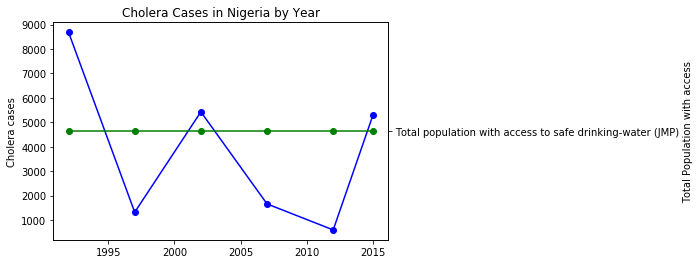

In [21]:
# #plot cholera vs. years
# x_axis = nigeria_data["Year"]
# y_axis = nigeria_data["Cholera Cases"]
# # z_axis = nigeria_data["Variable Name"] == "Total population with access to safe drinking-water (JMP)"
# z_axis = nigeria_data.loc[nigeria_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]
# z_axis
# fig, ax1=plt.subplots()

# # y_axis2 = nigeria_dependency

# ax1.plot(x_axis, y_axis, marker ='o', color='blue')
# ax2 =ax1.twinx()

# ax2.plot(x_axis, z_axis, marker ='o', color = "green")
# # Add labels 
# plt.title("Cholera Cases in Nigeria by Year")
# plt.xlabel("Year")
# plt.ylabel("Cholera cases")

# plt.show()
# 

,Country,Year,Cholera Cases,Variable Name,Value
4,Nigeria,1992,8687.0,Total population with access to safe drinking-...,42.4
14,Nigeria,1997,1322.0,Total population with access to safe drinking-...,48.3
18,Nigeria,2002,5429.0,Total population with access to safe drinking-...,54.2
10,Nigeria,2007,1661.0,Total population with access to safe drinking-...,60.1
24,Nigeria,2012,597.0,Total population with access to safe drinking-...,65.5
37,Nigeria,2015,5290.0,Total population with access to safe drinking-...,68.5


In [ ]:
#For Niger 

niger_data = total_data.loc[total_data["Country"].isin(["Niger"])]

#loc to filter out dependency data (line)
niger_dependency = niger_data.loc[niger_data["Variable Name"].isin(["Dependency ratio"])]

niger_access = niger_data.loc[niger_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


In [ ]:
#plot cholera vs. years
x_axis = niger_access["Year"]
y_axis1 = niger_access["Cholera Cases"]
# y_axis2 = nigeria_dependency

plt.plot(x_axis, y_axis1, marker ='o', color='purple')

# Add labels 
plt.title("Cholera Cases in Niger by Year")
plt.xlabel("Year")
plt.ylabel("Cholera cases")

plt.show()


In [ ]:
#For Myanmar 

myanmar_data = total_data.loc[total_data["Country"].isin(["Myanmar"])]

#loc to filter out dependency data (line)
myanmar_dependency = myanmar_data.loc[myanmar_data["Variable Name"].isin(["Dependency ratio"])]

myanmar_access = myanmar_data.loc[myanmar_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


In [ ]:
#plot cholera vs. years
x_axis = myanmar_access["Year"]
y_axis1 = myanmar_access["Cholera Cases"]
# y_axis2 = nigeria_dependency

plt.plot(x_axis, y_axis1, marker ='o', color='purple')

# Add labels 
plt.title("Cholera Cases in Myanmar by Year")
plt.xlabel("Year")
plt.ylabel("Cholera cases")

plt.show()


In [ ]:
#For Thailand 

thailand_data = total_data.loc[total_data["Country"].isin(["Thailand"])]

#loc to filter out dependency data (line)
thailand_dependency = thailand_data.loc[thailand_data["Variable Name"].isin(["Dependency ratio"])]

thailand_access = thailand_data.loc[thailand_data["Variable Name"].isin(["Total population with access to safe drinking-water (JMP)"])]


In [ ]:
#plot cholera vs. years
x_axis = thailand_access["Year"]
y_axis1 = thailand_access["Cholera Cases"]
# y_axis2 = nigeria_dependency

plt.plot(x_axis, y_axis1, marker ='o', color='purple')

# Add labels 
plt.title("Cholera Cases in Thailand by Year")
plt.xlabel("Year")
plt.ylabel("Cholera cases")

plt.show()
